<h2>Genre Based Recommendation System

<h3>Task 1.

In [160]:
#loading required libraries

import ast
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from matplotlib import pyplot as plt

<h3>Task 2.<br>

Loading Dataset

In [161]:
#low_memory=False is used to facilitate loding of large file
movies=pd.read_csv("movies_metadata.csv",low_memory=False)


<h3>Basic alanysis of dataset

<h6>this dataset describes attributes corresponding to movies which can be used for getting insights such as genre ,budget ,language ,imdb id etc which can be used to build our recommendation system

In [193]:
#top 5 entries in dataset
movies.head()

adult                              belongs_to_collection        budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  3.000000e+07   
1  False                                                NaN  6.500000e+07   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...  4.224300e+06   
3  False                                                NaN  1.600000e+07   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...  4.224300e+06   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview    ...     release_date  \
0  Led by Woody, Andy's toys live happily in his ...    ...       1995-10-30   
1  When siblings Judy and Peter discover an encha...    ...       1995-12-15   
2  A family wedding reignites the ancient feud be...    ...       1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...    ...       1995-12-22   
4  Just when George Banks has recovered from his ...    ...       1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [162]:
movies.describe()

revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000

<h3>Checking of null values in each column

In [163]:

movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

<h3>Task3
<br>Fixing bad Data

In [164]:

#A)

#fixing incorrect data with ligitimate data in budget dataset
movies[movies['budget']=='/ff9qCepilowshEtG2GYWwzt2bs4.jpg']#we get that it is at loc 19730
movies['budget'].iloc[19730]="0"
movies[movies['budget']=='/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg']#we get that it is at loc 29503
movies['budget'].iloc[29503]="0"
movies[movies['budget']=='/zaSf5OG7V8X8gqFvly88zDdRm46.jpg']#we get that it is at loc 35587
movies['budget'].iloc[35587]="0"
movies['budget']=movies['budget'].astype(int)

C:\Users\sudhir gupta\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [165]:
#By checking the dataset budget we find there are no null values 
movies['budget'].isna().sum()

0

In [166]:
#replacing all the columns with value 0 to mean of data
mean=np.mean(movies['budget'])
movies['budget']=movies['budget'].apply(lambda x:mean if x==0 else x)
    
        

In [167]:
#B)


#finding non null values of vote_count 
vote_count=movies['vote_count']
vote_count=vote_count.dropna()


#finding non null values of vote_average
vote_average=movies['vote_average']
vote_average=vote_average.dropna()
print(vote_average.head(),"\n","\n",vote_count.head())

0    7.7
1    6.9
2    6.5
3    6.1
4    5.7
Name: vote_average, dtype: float64 
 
 0    5415.0
1    2413.0
2      92.0
3      34.0
4     173.0
Name: vote_count, dtype: float64


<h3>Task 4

In [168]:
#A)


#we find that there is no null data in genre column of movie dataset
movies['genres'].isna().sum()

0

In [169]:
# by analysing the data in genre column we see that it is in form of string of list of dictionary
#to convert it into list of dictionary we use liter_eval function
movies['genres'].iloc[0]


"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [170]:
movies['genres']=movies['genres'].apply(ast.literal_eval)
#checking if all the values are of the form list if not replacing the data with empty list
movies['genres']=movies['genres'].apply(lambda x:x if isinstance(x,list) else [])


In [171]:
movies['genres'].head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [172]:

#converting the data into list of lists  (contained in upper ) in which each inner list contains all genre
#corresponding to a single movie 
upper=[]

for i in movies['genres']:
    inner=[]
    for j in i:
        inner.append(j['name'])
    upper.append(inner)

In [173]:
#converting the dataset into 1NF form
md=pd.DataFrame(upper).stack().reset_index(level=1)
del md['level_1']
md.columns=['genre']

In [174]:
#genre_df contains the data of all genre corresponding to each movie 
md.head()

genre
0  Animation
0     Comedy
0     Family
1  Adventure
1    Fantasy

In [175]:
#converting the release date column of movies into sting
movies['release_date']=movies['release_date'].astype(str)

In [176]:
#Adding the year column in md dataframe
year=movies['release_date'].apply(lambda x: x.split('-')[0])

In [177]:
#adding year of release, movie title , vote count ,vote average into md dataframe
movie_year=year.tolist()
movie_title=movies['original_title'].tolist()
votecount=movies['vote_count'].tolist()
voteavg=movies['vote_average'].tolist()
year1=[]
original_title=[]
votecount1=[]
voteavg1=[]

#loop to append data into list such that data is made equal to the corresponding entries in the data frame 
#since due to increase in number of column due to more number of genre per movie 
for i in md.index:
    year1.append(movie_year[i])
    votecount1.append(votecount[i])
    voteavg1.append(voteavg[i])
    original_title.append(movie_title[i])
    
#adding data to dataframe genre_df
md['movie_year']=year1
md['movie_title']=original_title
md['vote_count']=votecount1
md['vote_average']=voteavg1

#dropping all the columns with null data in it
md=md.dropna()

In [178]:
md.head()

genre movie_year movie_title  vote_count  vote_average
0  Animation       1995   Toy Story      5415.0           7.7
0     Comedy       1995   Toy Story      5415.0           7.7
0     Family       1995   Toy Story      5415.0           7.7
1  Adventure       1995     Jumanji      2413.0           6.9
1    Fantasy       1995     Jumanji      2413.0           6.9

In [187]:

# the minimum number of votes and vote average for a movie to be part of a
# recommendation system taking it to be 90%
vote_count_quant=vote_count.quantile(0.9)
vote_average_quant=vote_average.quantile(0.9)
print("vote count quantile= ",vote_count_quant,"vote average quantile= ",vote_average_quant)

vote count quantile=  160.0 vote average quantile=  7.4


In [180]:
#converting the vote_count column of the dataframe to type int
md['vote_count']=md['vote_count'].astype(int)

<h3>Task 5

In [181]:
words_list=md['genre'].tolist()

seperator=","
words=seperator.join(words_list)

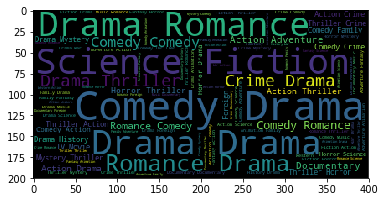

In [182]:
cloud=WordCloud().generate(words)
plt.imshow(cloud)
plt.show()

<h3>Task 6

In [191]:
#function which takes genre as argument and returns top 15 movie in that genre
def movie_recommendation(genre):
    df=md[md['genre']==genre]
    
    #calculating minimum vote count and vote average required to enter the recommendation system
    vote_count_quant=df['vote_count'].quantile(0.9)
    vote_average_quant=df['vote_average'].quantile(0.9)
    
    df=df[df['vote_count']>=vote_count_quant]
    df=df[df['vote_average']>=vote_average_quant]   
    
    count=df['vote_count'].count()
    
    #applying imdb formula and calculating top rated movies and returning top 15 movies from the entered genre
    final_list=[]
    for i in range(count):
        final_list.append(((df['vote_count'].iloc[i]*vote_average_quant)/(df['vote_count'].iloc[i]+vote_count_quant))+((vote_count_quant*votecountavg)/(df['vote_count'].iloc[i]+vote_count_quant)))
    df['wr']=final_list
    #sorting data in descending order
    df=df.sort_values("wr",ascending=False)
    
    return df.head(15)

In [192]:
#top comedy movies
movie_recommendation("Comedy")


genre movie_year                     movie_title  vote_count  \
7525   Comedy       1983                           Zelig         209   
21551  Comedy       2013      No se Aceptan Devoluciones         210   
6718   Comedy       2003               The Station Agent         213   
304    Comedy       1994          Trois couleurs : Blanc         218   
727    Comedy       1995                   A Close Shave         223   
6841   Comedy       1986          Hannah and Her Sisters         224   
34676  Comedy       2006               Nos jours heureux         225   
33869  Comedy       2015                Miss You Already         232   
6624   Comedy       2003    Les triplettes de Belleville         233   
1224   Comedy       1944            Arsenic and Old Lace         234   
10631  Comedy       1966            La Grande Vadrouille         234   
13480  Comedy       2008  Dr. Horrible's Sing-Along Blog         236   
2906   Comedy       1926                     The General         240   
8739   Comedy       1976        Les 12 travaux d'Astérix         241   
1247   Comedy       1979                     Being There         243   

       vote_average         wr  
7525            7.4  58.352041  
21551           7.5  58.229614  
6718            7.4  57.865831  
304             7.3  57.270939  
727             7.5  56.689881  
6841            7.6  56.575288  
34676           7.4  56.461225  
33869           7.3  55.677333  
6624            7.3  55.567384  
1224            7.4  55.457934  
10631           7.8  55.457934  
13480           7.8  55.240517  
2906            8.0  54.811519  
8739            7.3  54.705467  
1247            7.7  54.494776

In [185]:
#top family movies
movie_recommendation("Family")


genre movie_year                          movie_title  vote_count  \
16383  Family       2010                         借りぐらしのアリエッティ         701   
19901  Family       2012                             Paperman         734   
24464  Family       2014                     The Book of Life         778   
1042   Family       1971  Willy Wonka & the Chocolate Factory         826   
5255   Family       2002     Spirit: Stallion of the Cimarron         870   
6212   Family       1986                             天空の城ラピュタ         877   
13264  Family       2008                              崖の上のポニョ         953   
1006   Family       1965                   The Sound of Music         966   
40015  Family       2016             Kubo and the Two Strings         982   
926    Family       1946                It's a Wonderful Life        1103   
14378  Family       2009                    Fantastic Mr. Fox        1206   
999    Family       1964                         Mary Poppins        1217   
13371  Family       2009                             Coraline        1432   
2646   Family       1999                       The Iron Giant        1470   
1610   Family       1997                            Anastasia        1481   

       vote_average         wr  
16383           7.4  50.473448  
19901           8.0  49.327527  
24464           7.3  47.891023  
1042            7.4  46.431899  
5255            7.4  45.183582  
6212            7.8  44.992292  
13264           7.5  43.033314  
1006            7.4  42.718440  
40015           7.7  42.338439  
926             8.0  39.708872  
14378           7.5  37.762790  
999             7.4  37.568681  
13371           7.3  34.216409  
2646            7.6  33.699649  
1610            7.4  33.553743

In [186]:
#top action movies
movie_recommendation("Action")


genre movie_year                      movie_title  vote_count  \
12156  Action       2007                   Tropa de Elite         519   
11492  Action       2006            Letters from Iwo Jima         553   
4425   Action       1988                        They Live         562   
37505  Action       2015         Lo chiamavano Jeeg Robot         575   
1189   Action       1981                         Das Boot         623   
4725   Action       1971                      Dirty Harry         630   
548    Action       1993                        Tombstone         632   
6938   Action       2002                               英雄         647   
1242   Action       1959                          Ben-Hur         660   
2577   Action       1998                       Lola rennt         672   
15571  Action       2010                        葉問2: 宗師傳奇         684   
1325   Action       1982  Star Trek II: The Wrath of Khan         688   
43190  Action       2001                 Band of Brothers         725   
3618   Action       1986      Big Trouble in Little China         727   
1357   Action       1992         The Last of the Mohicans         747   

       vote_average         wr  
12156           7.8  57.094668  
11492           7.2  55.467112  
4425            7.1  55.053875  
37505           7.5  54.469291  
1189            7.9  52.428977  
4725            7.4  52.146025  
548             7.4  52.065829  
6938            7.3  51.473342  
1242            7.5  50.972340  
2577            7.2  50.519814  
15571           7.2  50.076529  
1325            7.3  49.930772  
43190           8.2  48.627961  
3618            7.1  48.559793  
1357            7.1  47.890223